In [1]:
from datasets import load_dataset
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
#신발 브랜드 분류용 이미지 데이터 로드
dataset = load_dataset("keremberke/shoe-classification",'full',split='train')

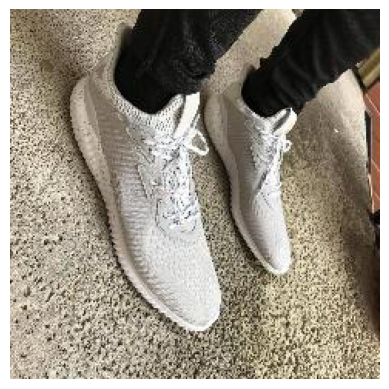

In [2]:
query_image_0 = dataset[65]['image']
plt.imshow(query_image_0)
plt.axis('off')
plt.show()

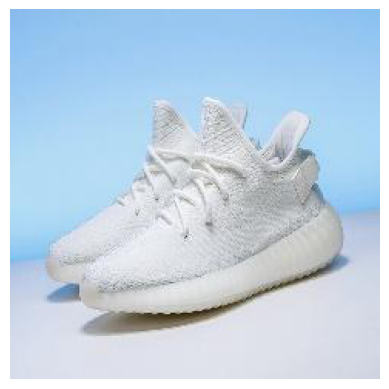

In [3]:
query_image_1 = dataset[94]['image']
plt.imshow(query_image_1)
plt.axis('off')
plt.show()

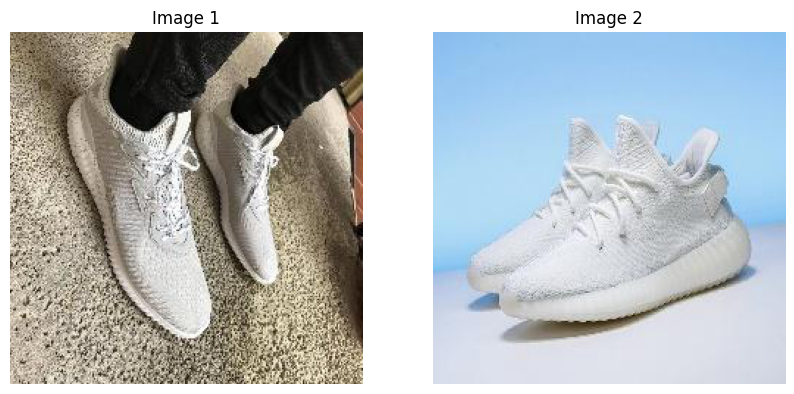

In [4]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(query_image_0)
plt.axis('off')
plt.title('Image 1')

plt.subplot(1, 2, 2)
plt.imshow(query_image_1)
plt.axis('off')
plt.title('Image 2')

plt.show()

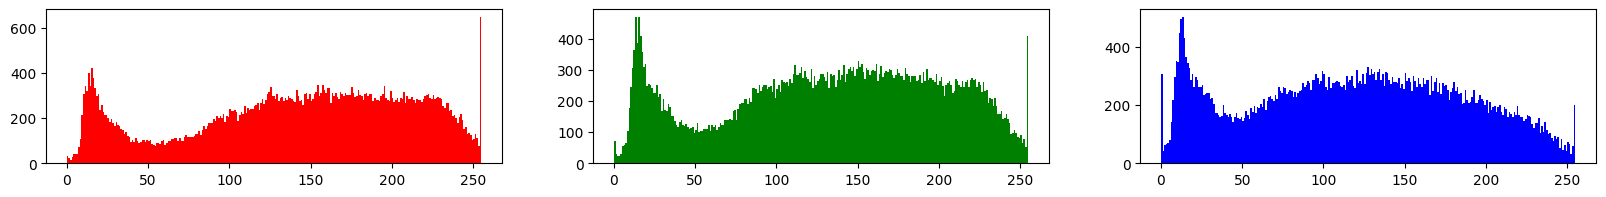

In [5]:
query_image_0 = np.array(query_image_0)
img_vector = query_image_0.reshape(1, -1, 3)
red_channel = img_vector[0, :, 0]
green_channel = img_vector[0, :, 1]
blue_channel = img_vector[0, :, 2]
fig, axs = plt.subplots(1, 3, figsize=(20, 2))
axs[0].hist(red_channel, bins=255, color='r')
axs[1].hist(green_channel, bins=255, color='g')
axs[2].hist(blue_channel, bins=255, color='b')
plt.show()

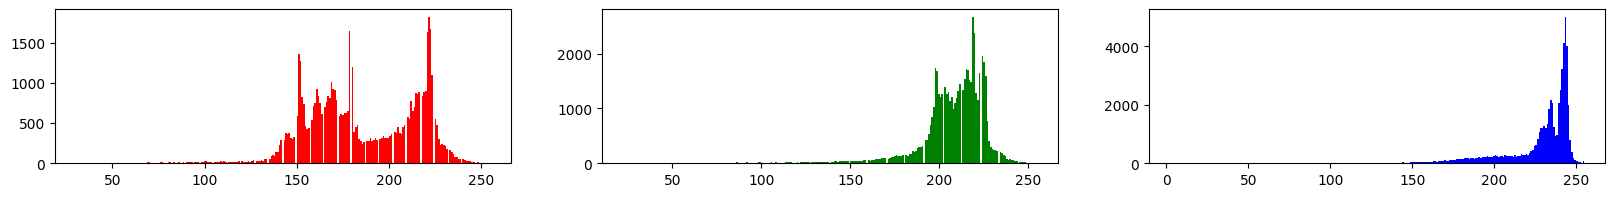

In [6]:
query_image_1 = np.array(query_image_1)
img_vector = query_image_1.reshape(1, -1, 3)
red_channel = img_vector[0, :, 0]
green_channel = img_vector[0, :, 1]
blue_channel = img_vector[0, :, 2]
fig, axs = plt.subplots(1, 3, figsize=(20, 2))
axs[0].hist(red_channel, bins=255, color='r')
axs[1].hist(green_channel, bins=255, color='g')
axs[2].hist(blue_channel, bins=255, color='b')
plt.show()


# 컬러 히스토그램만으로 만드는 유사 신발 검색 로직

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

def get_vector(image, bins=32):
    color_hist = [cv2.calcHist([image], [i], None, [bins], [0, 256]) for i in reversed(range(3))]
    vector = np.concatenate(color_hist, axis=0).flatten()
    return vector

def cosine(a, b):
    norm_product = np.linalg.norm(a) * np.linalg.norm(b)
    return np.dot(a, b) / norm_product if norm_product != 0 else 0

def search(idx, top_k=3):
    query_vector = image_vectors[idx]
    distances = [(i, cosine(query_vector, vector)) for i, vector in enumerate(image_vectors) if i != idx]
    top_idx = sorted(distances, key=lambda x: x[1], reverse=True)[:top_k]
    return [i[0] for i in top_idx]

image_vectors = [get_vector(np.array(imageset['image'])) for imageset in dataset]


In [8]:
search_index = 65
result = search(search_index)
print(result)

[340, 123, 469]


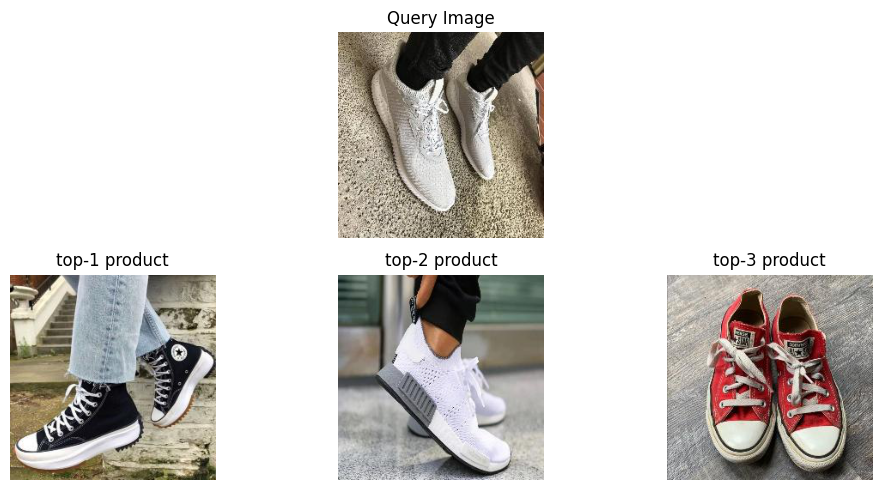

In [9]:
plt.figure(figsize=(10, 5))
gs = gridspec.GridSpec(2, 3, height_ratios=[1, 1])

ax0 = plt.subplot(gs[0, :])
ax0.imshow(dataset[search_index]['image'])
ax0.axis('off')
ax0.set_title('Query Image')

for i, pic in enumerate(result):
    ax = plt.subplot(gs[1, i])
    ax.imshow(dataset[pic]['image'])
    ax.axis('off')
    ax.set_title(f'top-{i+1} product')

plt.tight_layout()
plt.show()

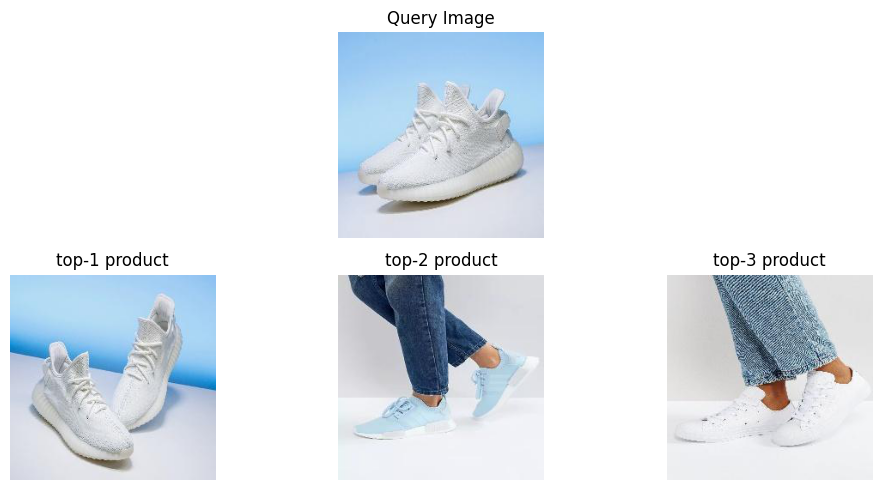

In [10]:
search_index = 94
result = search(search_index)

plt.figure(figsize=(10, 5))
gs = gridspec.GridSpec(2, 3, height_ratios=[1, 1])

ax0 = plt.subplot(gs[0, :])
ax0.imshow(dataset[search_index]['image'])
ax0.axis('off')
ax0.set_title('Query Image')

for i, pic in enumerate(result):
    ax = plt.subplot(gs[1, i])
    ax.imshow(dataset[pic]['image'])
    ax.axis('off')
    ax.set_title(f'top-{i+1} product')

plt.tight_layout()
plt.show()

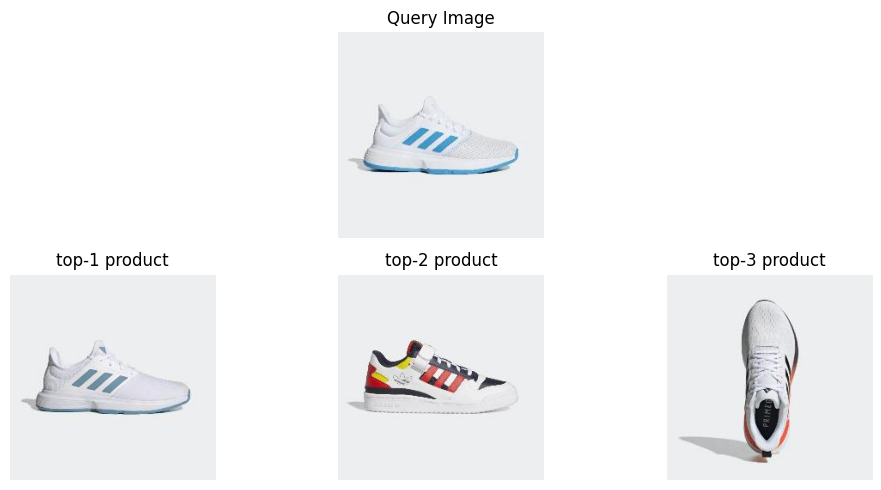

In [11]:
search_index = 155
result = search(search_index)
plt.figure(figsize=(10, 5))
gs = gridspec.GridSpec(2, 3, height_ratios=[1, 1])


ax0 = plt.subplot(gs[0, :])
ax0.imshow(dataset[search_index]['image'])
ax0.axis('off')
ax0.set_title('Query Image')

for i, pic in enumerate(result):
    ax = plt.subplot(gs[1, i])
    ax.imshow(dataset[pic]['image'])
    ax.axis('off')
    ax.set_title(f'top-{i+1} product')

plt.tight_layout()
plt.show()